## This notebook has code for analysis of our data and to form comparisons between the final dataset and the initial (general) contribution and misconduct datasets. 

##### Please note that the original code (with more representations/exploration) was deleted & lost, but salvaged by a PDF file that is also in this folder. You can view that file for more context. 

In [2]:
import pandas as pd
all_contributions=pd.read_csv('processedPoliceContributions.csv')
all_misconducts=pd.read_csv('processedBostonPoliceInternalAffairs.csv')
final_df=pd.read_csv('filtered_final_dataset.csv')

In [3]:
all_contributions=all_contributions.drop(['Unnamed: 0'],axis=1)
all_contributions['Employer'] =all_contributions['Employer'].str.lower()
all_contributions['Occupation'] =all_contributions['Occupation'].str.lower()
bos_cont=all_contributions[all_contributions['Employer'].str.contains("boston", na = False) | all_contributions['Occupation'].str.contains('boston', na = False)]

In [4]:
bos_cont

,Address,Amount,CPF ID,City,Contributor,Date,Datetime,Employer,Occupation,Principal Officer,Recipient,Record Type Description,Record Type ID,Source Description,State,Tender Type Description,Tender Type ID,UUID,Zip
1,71 GROVE CR,100.0,13284,BRAINTREE,michael linskey,1/10/2010,2010-01-10,NaN,boston city police officer,NaN,"Ayers, Bruce J.",Individual,201,2010 Pre-primary Report (ND),MA,Not Specified,0,d66afb95-ed6a-5842-8cb6-5d795165bead,02184
9,433 W Roxbury Parkway,100.0,13014,Dedham,brendan kelley,1/29/2010,2010-01-29,city of boston,police officer,NaN,"Cahill, Timothy",Individual,201,1/29/10 Deposit Report,MA,Credit Card,3,d3fd70f7-b957-56b4-b97e-39a739bab7d4,02132-1235
12,9 Oakland Avenue,100.0,13014,Quincy,gerard bailey,1/31/2010,2010-01-31,city of boston,police officer,NaN,"Cahill, Timothy",Individual,201,1/31/10 Deposit Report,MA,Check,1,dfc80914-df04-56fe-be41-dacbe8ade738,02171
24,8 Berwick Street,250.0,13878,West Roxbury,james b conley,2/8/2010,2010-02-08,city of boston,police officer,NaN,"Conley, Daniel F.",Individual,201,2/8/10 Deposit Report,MA,Check,1,3f3d5bd2-c66b-5844-82fa-d1c3b8675318,02132
28,38 Riverside Ave.,100.0,13729,Quincy,joseph f. kintigos,2/10/2010,2010-02-10,city of boston,police officer,NaN,"Wallace, Brian P.",Individual,201,2010 Pre-primary Report (ND),MA,Not Specified,0,db5a251d-2ad1-5e24-99b4-783cfce242dc,02169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,7 Glenburnie Rd,100.0,13173,West Roxbury,michael conneely,12/23/2019,2019-12-23,boston police,city of boston,NaN,"Walsh, Martin J.",Individual,201,12/23/19 Deposit Report,MA,Credit Card,3,6627e512-e76e-5d48-803d-10a5bf12f9b2,02132-7812
10357,651 Walpole St,250.0,13173,Norwood,michael talbot,2/3/2020,2020-02-03,boston police superior officers union,vice president,NaN,"Walsh, Martin J.",Individual,201,2/3/20 Deposit Report,MA,Check,1,dd7aa546-e7c0-5ee2-aee2-630d18a9fcdf,02062-2419
10360,8 Eastbourne St,100.0,14092,Roslindale,william parlon,2/28/2020,2020-02-28,boston police department,captain,NaN,"O'Malley, Matthew J.",Individual,201,2/28/20 Deposit Report,MA,Credit Card,3,354180c7-c450-5404-b530-0fbd55ce3e60,02131
10363,20 Old Ironsides Way,25.0,16314,Charlestown,marian callahan,3/12/2020,2020-03-12,boston police department,research anaylst,NaN,"Edwards, Lydia",Individual,201,3/12/20 Deposit Report,MA,Check,1,a161e685-89a9-5059-8d65-c71a21d2e451,02129-2206


In [5]:
all_disciplined_n=all_misconducts['Name'].nunique()

In [6]:
all_contributors_n=bos_cont['Contributor'].nunique()

In [7]:
unique_both=final_df['Name'].nunique()

In [8]:
print('Percentage of officers that contributed money out of the disciplined officers(minimum of one payment) = ',(unique_both/all_disciplined_n))

Percentage of officers that contributed money out of the disciplined officers(minimum of one payment) =  0.27098976109215017


In [9]:
print('Percentage of officers that contributed money in disciplined officers set out of all boston area police donations =',(unique_both/all_contributors_n))

Percentage of officers that contributed money in disciplined officers set out of all boston area police donations = 0.32946058091286307


Takeaway: We now know that about 27% of all disciplined officers contributed at least onceto political campaigns, and that about 33% of all Boston Police officers who madedonations were also accused of misconduct.

## Let's explore the demographics and positions of ALL officers under investigation

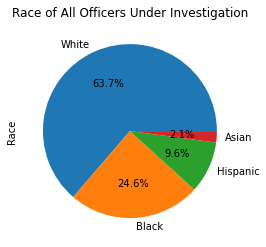

In [20]:
import matplotlib.pyplot as plt
all_misconducts.drop_duplicates(subset= ["Name"])['Race'].value_counts().plot(kind = "pie",autopct='%1.1f%%')
plt.title("Race of All Officers Under Investigation")
plt.show()


#### Here are all of the value counts of the ranks in our dataset

In [11]:
all_misconducts['Rank'].value_counts()

Police Officer               4017
Detective                     581
Sergeant                      501
Sergeant Detective            243
Lieutenant                    114
Captain                        82
Lieutenantenant Detective      73
Deputy Superintendent          30
Superintendent                 12
Lieutenantenant                 4
Deputy                          3
Name: Rank, dtype: int64

### Barplot of the Officer Ranks From Total Misconduct Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

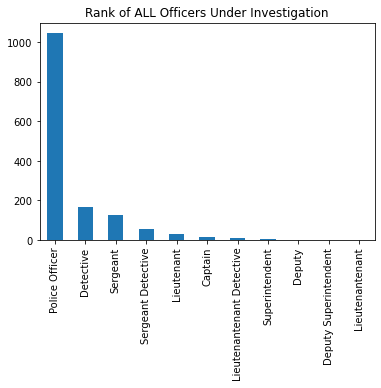

In [12]:
all_misconducts.drop_duplicates(subset= ["Name"])['Rank'].value_counts().plot(kind = "bar")
plt.title("Rank of ALL Officers Under Investigation")
plt.show

### Same information but shown with a Pie Chart

In [14]:
vals=all_misconducts.drop_duplicates(subset= ["Name"])['Rank'].value_counts()
labels=vals.index.tolist()
x=vals.tolist()

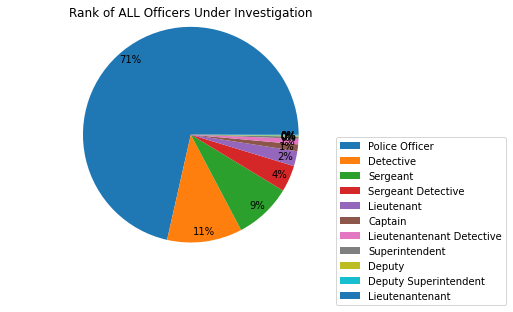

In [16]:
plt.figure()
plt.gca().axis("equal")
pie=plt.pie(x, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Rank of ALL Officers Under Investigation')
plt.legend(pie[0],labels, bbox_to_anchor=(0.75,0.5), loc="best", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.show()
plt.clf()
plt.close()

In [17]:
all_misconducts['Allegation'].value_counts()


Neg.Duty/Unreasonable Judge                         1454
Respectful Treatment                                1305
Force                                                536
Conduct Unbecoming                                   362
Conformance to Laws                                  338
                                                    ... 
Ballistic Procedures                                   1
Special Order 92-15 Towed Motor Vehicles               1
Special Order 99-48 Dept E-Mail and Computer Use       1
Prisoner                                               1
Police Officer Notifying Operations                    1
Name: Allegation, Length: 95, dtype: int64

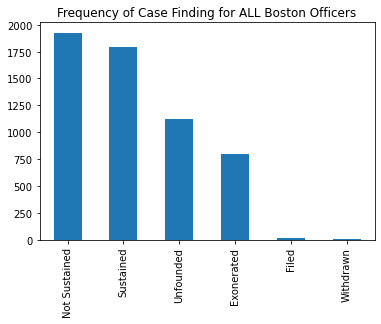

In [18]:
all_misconducts['Finding'].value_counts().plot(kind='bar')
plt.title("Frequency of Case Finding for ALL Boston Officers")
plt.show()

## Now, we can analyze the total contribution dataset

In [53]:
vals1=all_contributions['Occupation'].value_counts()
labels1=vals1.index.tolist()
x1=vals1.tolist()
print(labels1)
print(len(labels1))

['police officer', 'deputy sheriff', 'state trooper', 'trooper', 'sheriff', 'law enforcement', 'detective', 'police chief', 'state police', 'police', 'retired', 'state police officer', 'chief of police', 'police lieutenant', 'police detective', 'police sergeant', 'police captain', 'special sheriff', 'sergeant', 'policeman', 'boston police officer', 'retired police officer', 'captain', 'police dept', 'lieutenant', 'police office', 'officer', 'environmental police', 'vice president', 'dispatcher', 'police officer ', 'police department', 'boston police', 'president', 'patrolman', 'chief', 'ma state police', 'legislative agent', 'law enforcement officer', 'deputy chief', 'sargent', 'private detective', 'trooper representative', 'boston police patrolman', 'secretary', 'police lt', 'administrator', 'auxiliary police officer', 'treasurer', 'city of boston', 'asst. deputy sheriff', 'retire sheriff dept.', 'retired police chief', 'police sargeant', 'boston police department', 'executive directo

In [51]:
labels2 = ['police officer','lieutenant','sergeant','detective','captain','superintendent','deputy','other']
x2 = [0]*len(labels2)
for i in range(len(labels1)):
    if 'deputy' in labels1[i]: 
        x2[6] += x1[i]
    elif 'captain' in labels1[i]:
        x2[4] += x1[i]
    elif 'lieutenant' in labels1[i]:
        x2[1] += x1[i]
    elif 'sergeant' in labels1[i]: 
        x2[2] += x1[i]
    elif "police officer" in labels1[i]: 
        x2[0] += x1[i]
    elif 'superintendent' in labels1[i]: 
        x2[5] += x1[i]
    elif 'detective' in labels1[i]:
        x2[3] += x1[i]
    else: 
        x2[7] += x1[i]
    

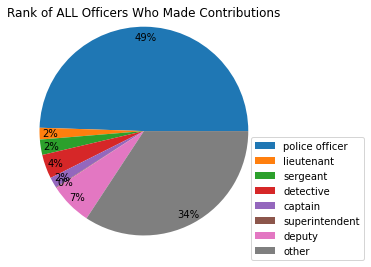

In [52]:
# plt.figure()
# plt.gca().axis("equal")
pie=plt.pie(x2, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Rank of ALL Officers Who Made Contributions')
plt.legend(pie[0],labels2, bbox_to_anchor=(0.75,0.5), loc="best", bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.show()
# plt.clf()
# plt.close()

In [35]:
all_contributions

,Address,Amount,CPF ID,City,Contributor,Date,Datetime,Employer,Occupation,Principal Officer,Recipient,Record Type Description,Record Type ID,Source Description,State,Tender Type Description,Tender Type ID,UUID,Zip
0,22 WEST ST,100.0,13237,NEWTON CORNER,allan l ciccone jr,1/7/2010,2010-01-07,town of sherborn,police officer,NaN,"Balser, Ruth B.",Individual,201,2010 Pre-primary Report (ND),MA,Not Specified,0,5b972ca5-25e7-5024-89f1-154eae42d793,024581326
1,71 GROVE CR,100.0,13284,BRAINTREE,michael linskey,1/10/2010,2010-01-10,NaN,boston city police officer,NaN,"Ayers, Bruce J.",Individual,201,2010 Pre-primary Report (ND),MA,Not Specified,0,d66afb95-ed6a-5842-8cb6-5d795165bead,02184
2,Ricca Farm Rd,200.0,15274,Billerica,william haffner,1/21/2010,2010-01-21,city of medford,police officer,NaN,"McGlynn, Michael J.",Individual,201,2010 Year-end report (MUN),MA,Not Specified,0,50d17239-e35b-5cad-a356-c4317d8ffa79,NaN
3,8 Skipper Way,200.0,10419,Gloucester,matthew maglio,1/21/2010,2010-01-21,town of lynnfield,police officer,NaN,"Tisei, Richard R.",Individual,201,1/21/10 Deposit Report,MA,Check,1,a1b3855a-a2d6-53c4-abb9-c1629afcd422,01930
4,156 Chuckles Way,100.0,14944,Marstons Mills,donna colbert,1/24/2010,2010-01-24,NaN,retired police officer,NaN,"Shea, John F.",Individual,201,1/24/10 Deposit Report,MA,Check,1,18cf8b29-1725-5f0b-8010-7b3457228e1d,02648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10362,214 Read St,250.0,13597,Fall River,charles cullen,3/6/2020,2020-03-06,fr police dept.,deputy chief,NaN,"Fiola, Carole",Individual,201,3/6/20 Deposit Report,MA,Check,1,26c780bc-cb16-5e68-b659-5fe1a1aafced,02720
10363,20 Old Ironsides Way,25.0,16314,Charlestown,marian callahan,3/12/2020,2020-03-12,boston police department,research anaylst,NaN,"Edwards, Lydia",Individual,201,3/12/20 Deposit Report,MA,Check,1,a161e685-89a9-5059-8d65-c71a21d2e451,02129-2206
10364,14 Brierwood Rd,500.0,15960,Braintree,bruce tobin,5/13/2020,2020-05-13,massachusetts state police,state troop,NaN,"Phelan, William J.",Individual,201,5/13/20 Deposit Report,MA,Credit Card,3,daa5b7b7-8702-574f-bb16-30b1798b2de8,02184
10365,24 Washburn Ave #1,100.0,13645,Cambridge,daniel delaney,5/29/2020,2020-05-29,delaney police group,legislative agent,NaN,"Stanley, Thomas M.",Individual,201,5/29/20 Deposit Report,MA,Credit Card,3,b4e1d1ec-68b5-53f6-a994-5a1b3e5bad16,02140
